# Welcome to this little lightcurves demo
<code>https://pypi.org/project/lightcurves/</code>
<code>https://github.com/swagner-astro/lightcurves</code> <br>

An Illustration for
1. initializing a light curve
2. studying Bayesian blocks
3. characterizing flares (HOP baseline, half, flip, sharp, comparison)
4. initializing a single flare/HOP group
5. working with a set of light curves

Let me know if you have any problems or questions!
    



In [1]:
from __future__ import annotations

import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(10, 3)


In [2]:

!pip install -U git+https://github.com/swagner-astro/lightcurves.git

  Cloning https://github.com/swagner-astro/lightcurves.git to /tmp/pip-req-build-ih6put5e
  Running command git clone --filter=blob:none --quiet https://github.com/swagner-astro/lightcurves.git /tmp/pip-req-build-ih6put5e
  Resolved https://github.com/swagner-astro/lightcurves.git to commit 3090ca98d95f0260529c40472d4be9d496d77168
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for lightcurves: filename=lightcurves-1.0.2.dev44+g3090ca9-py3-none-any.whl size=20220 sha256=a5cb3cf1d2bc24dc35e884659f6b50fb49712df0a30eec1f0a0055181b9b6f02
  Stored in directory: /tmp/pip-ephem-wheel-cache-hv5g2oe9/wheels/5c/1c/7b/68ec88e58f9049f80b0cc733dbcb5a6e2b7c1b934a3b6f5a5f
Successfully built lightcurves
  Attempting uninstall: lightcurves
    Found existing installation: lightcurves 1.0.2.dev43+g2fb3c63
    Uninstalling lightcurves-1.0.2.dev43+g2fb3c63:
      Successfully uninstalled lightcurves-1.0.

In [3]:
from lightcurves.LC import LightCurve
from lightcurves.HOP import Hopject
from lightcurves.LC_Set import LC_Set

## 1. Initialize and plot light curve

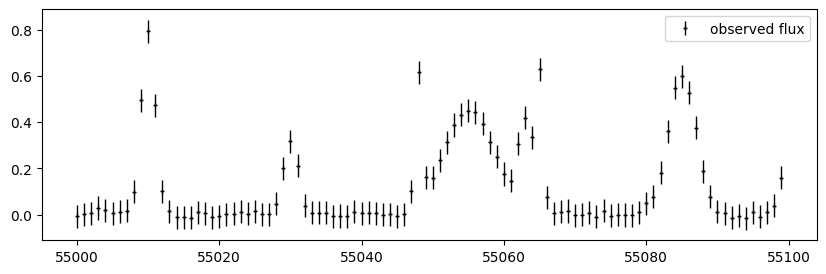

In [4]:
time, flux, flux_error = np.load("lightcurves/lc.npy")  # mock lc with gaussian flares
time += 55000  # e.g. MJD
lc = LightCurve(time, flux, flux_error)
lc.plot_lc(label='observed flux')
plt.legend()

## 2. Get and plot Bayesian blocks

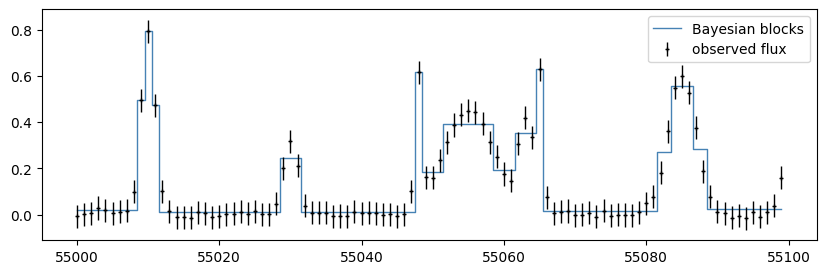

In [5]:
block_pbin, block_val, block_val_error, edge_index, edges = lc.get_bblocks(
    p0_value=0.05
)
# for more information on edges and edge_index see Appendix A2
lc.plot_bblocks(label='Bayesian blocks')
lc.plot_lc(label='observed flux')
plt.legend()

## 3. Characterize flares as group of blocks

### 3.1. HOP baseline

hops_bl is a list of Hopjects with interesting attributes, see HOP.py
[<lightcurves.HOP.Hopject object at 0x7f7035af1550>, <lightcurves.HOP.Hopject object at 0x7f7035a71550>, <lightcurves.HOP.Hopject object at 0x7f7037c191d0>, <lightcurves.HOP.Hopject object at 0x7f7037b9bc90>]
55008.5 55010.0 55011.5


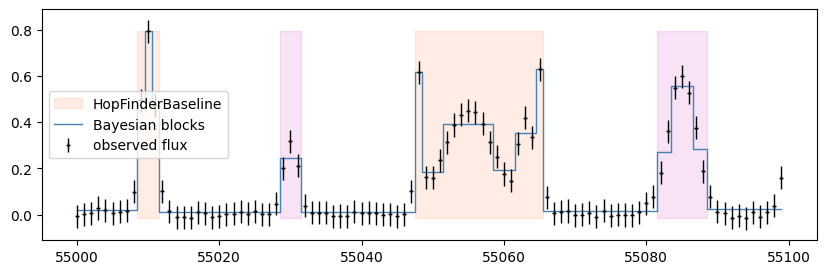

In [6]:
hops_bl = lc.find_hop("baseline")
print("hops_bl is a list of Hopjects with interesting attributes, see HOP.py")
print(hops_bl)

hop = hops_bl[0]
print(hop.start_time, hop.peak_time, hop.end_time)

lc.plot_hop()
lc.plot_bblocks(label='Bayesian blocks')
lc.plot_lc(label='observed flux')
plt.legend()

### 3.2. HOP half

55000.0 55010.0 55020.0


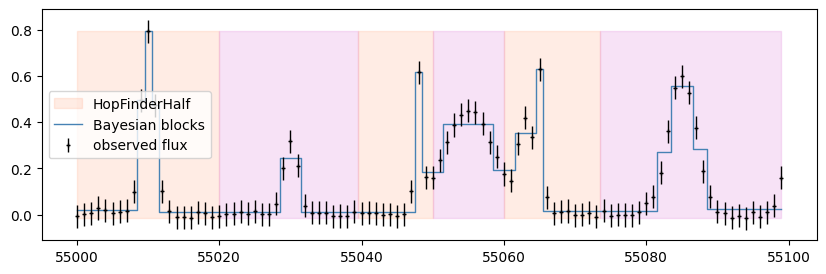

In [7]:
hops_half = lc.find_hop("half", lc_edges="add")
# one could add the edges of the light curve as start and end of HOP if there is a peak

hop = hops_half[0]
print(hop.start_time, hop.peak_time, hop.end_time)

lc.plot_hop()
lc.plot_bblocks(label='Bayesian blocks')
lc.plot_lc(label='observed flux')
plt.legend();

### 3.3. HOP flip

55025.5 55030.0 55034.5


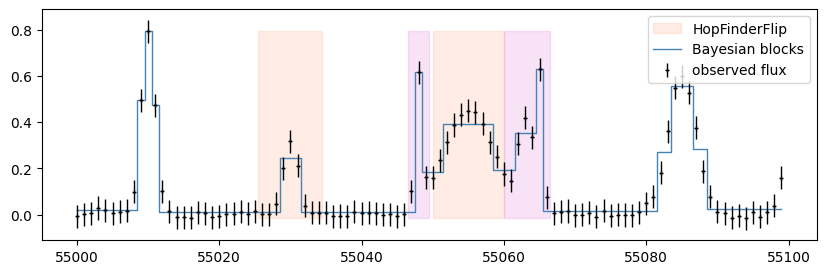

In [8]:
hops_flip = lc.find_hop("flip", lc_edges="neglect")
# or one could conservatively neglect the edges of the light curve
# because it is uncertain whether there would be more decrease/increase of flux

hop = hops_flip[0]
print(hop.start_time, hop.peak_time, hop.end_time)

lc.plot_hop()
lc.plot_bblocks(label='Bayesian blocks')
lc.plot_lc(label='observed flux')
plt.legend();

### 3.4. HOP sharp

55028.5 55030.0 55031.5


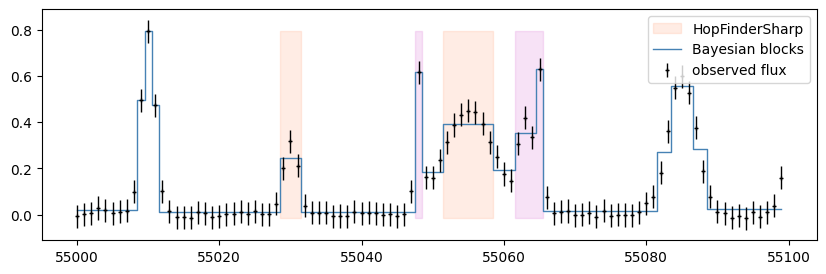

In [9]:
hops_sharp = lc.find_hop("sharp", lc_edges="neglect")

hop = hops_sharp[0]
print(hop.start_time, hop.peak_time, hop.end_time)

lc.plot_hop()
lc.plot_bblocks(label='Bayesian blocks')
lc.plot_lc(label='observed flux')
plt.legend()

### Comparison

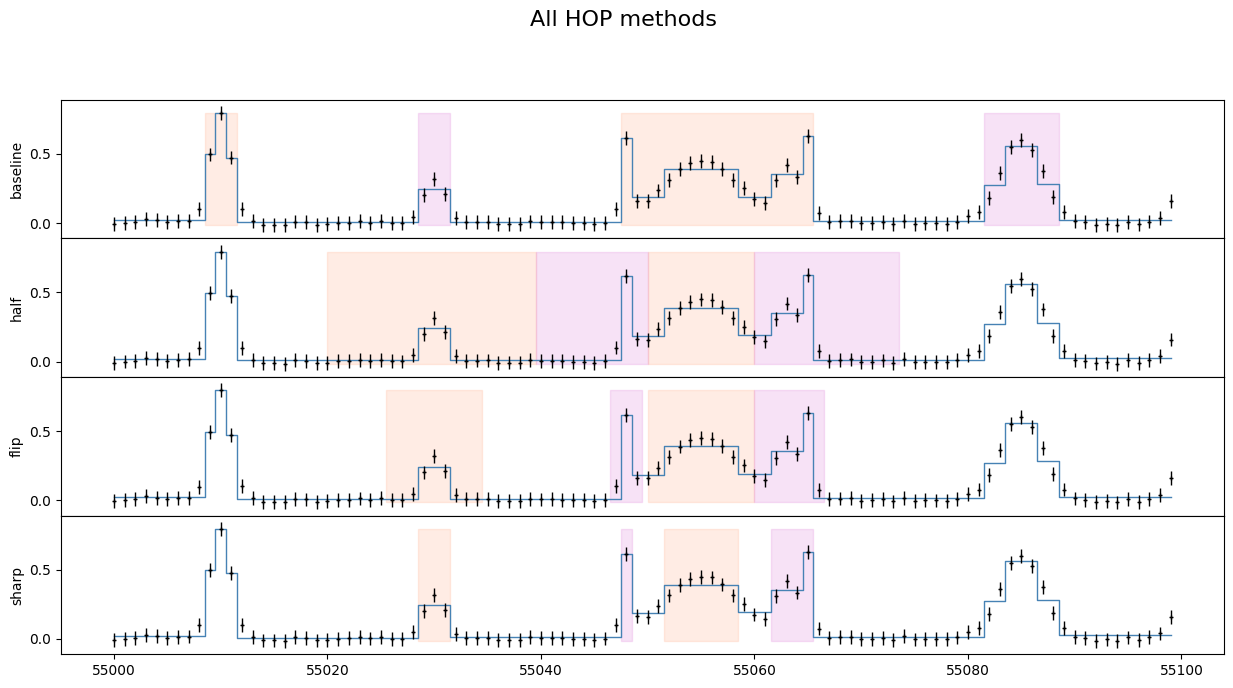

In [10]:
lc.plot_all_hop()
"""
note that by default the edges are neglected because in general
we could not know whether the flare continues or actually ends
(this corresponds to the more conservative assumption)
this can be adjusted with lc_edges='neglect' | 'add'
"""

## 4. Properties of individual flares

asymmetry measure:  0.5384615384615384


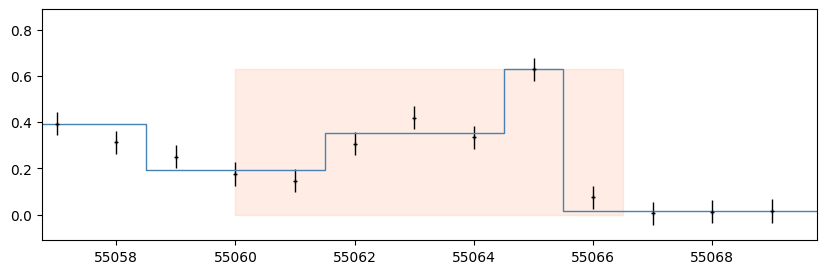

In [11]:
hop = hops_flip[3]
print("asymmetry measure: ", hop.asym)
hop.plot_hop()

## 5. Distribution of flare properties in sample of light curves

### 5.1. Create mock light curves
Create 10 light curves with 60 Gaussian flares at random position of 2000 bins. This is neither part of the repository nor useful physics but included for illustrative purposes.

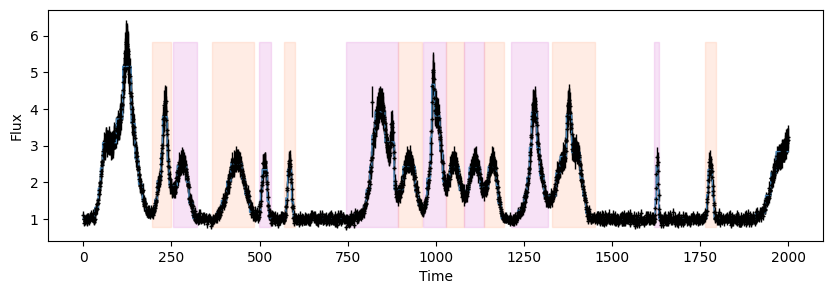

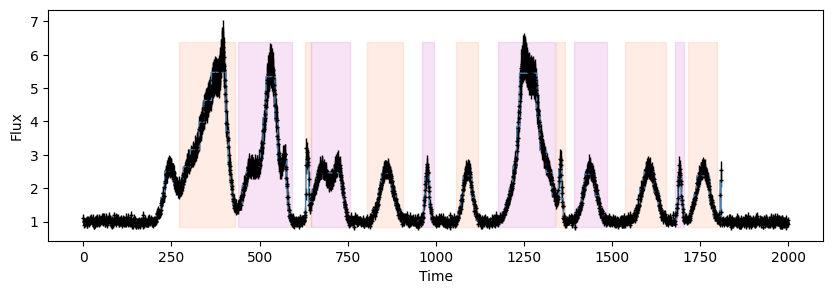

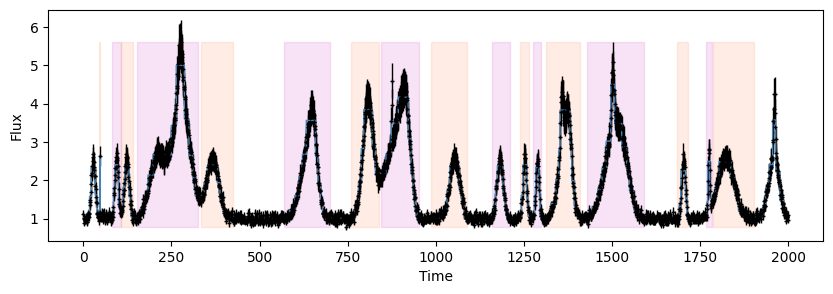

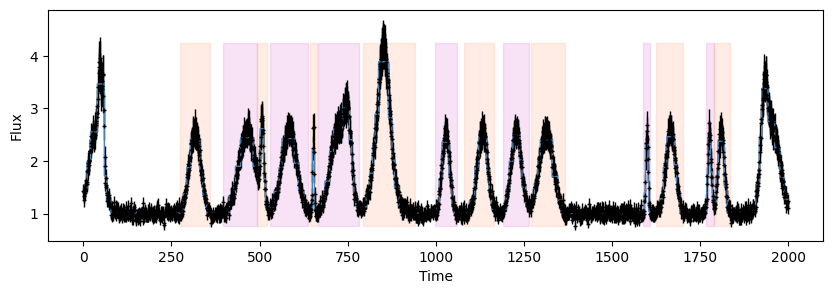

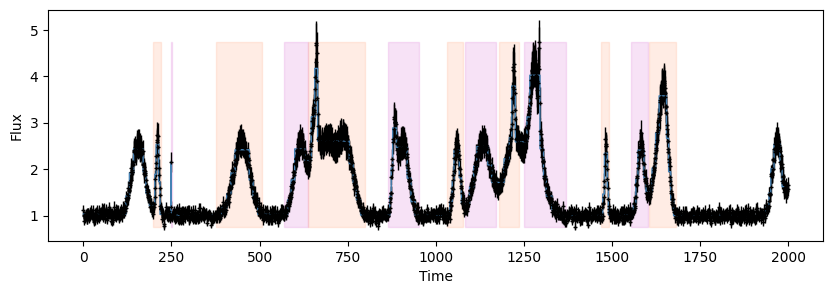

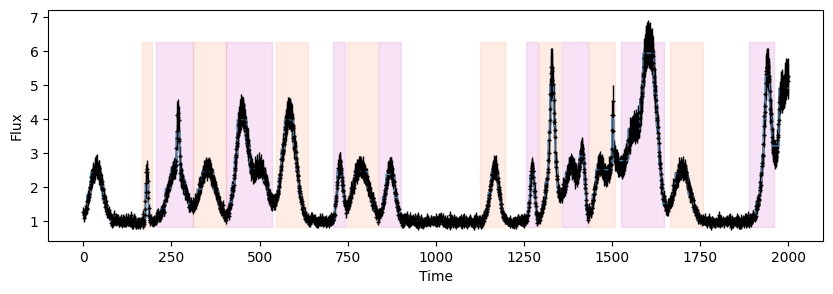

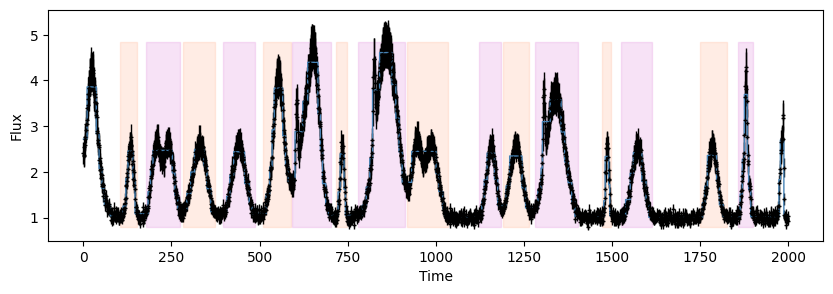

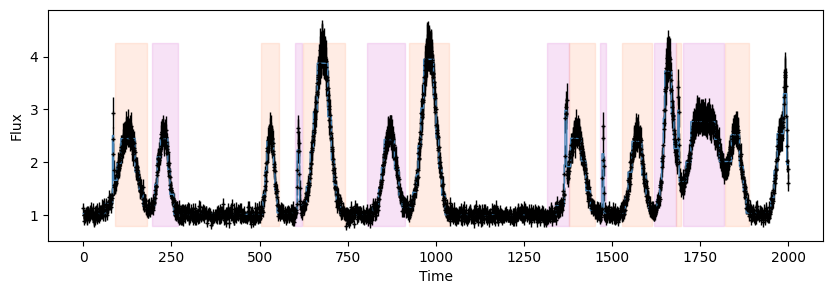

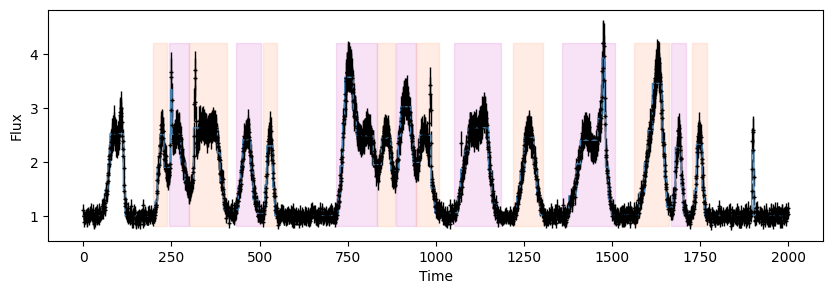

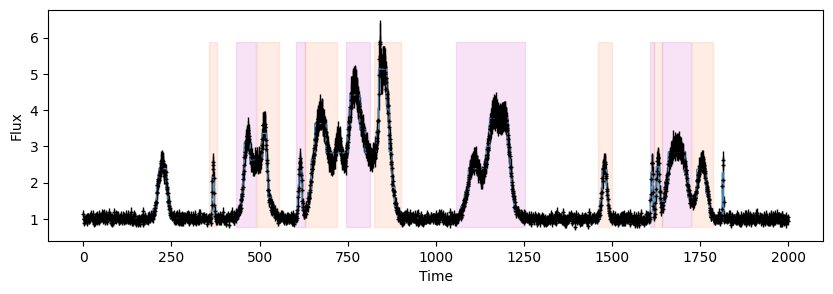

In [12]:
time = np.arange(
    0, 2000, 1
)  # e.g. daily binning for 12 years = 4380 days of observation
N_b = len(time)  # number of bins
flux = np.ones(N_b)
rel_flux_error = 0.1  # flux error ~ 5%
noise = np.random.normal(0, 0.07, N_b)  # white noise backround with strength

# maximum values for gaussian flares
amp_max = 100
cen_max = 4380
wid_max = 40


def gaussian(x, amp, cen, wid):
    "1-d Gaussian: gaussian(x=data, amp, cen, wid)"
    return (amp / (np.sqrt(2 * np.pi) * wid)) * np.exp(-((x - cen) ** 2) / (2 * wid**2))


def rand_gauss(x, amp_max, cen_max, wid_max):
    "random 1-d Gaussian"
    "takes maximum values for parameters and multiplies each with uniform random number [0,1) ... 0 aba kee1"
    "https://numpy.org/doc/stable/reference/random/generated/numpy.random.random.html"
    amp = np.random.random(1) * amp_max
    cen = np.random.random(1) * cen_max
    # wid = np.random.random(1) * wid_max
    wid = amp * 0.25  # assume that flares are self similar; always same shape
    return gaussian(x, amp, cen, wid)


lc_array = np.zeros(10, dtype=object)
for l in range(10):
    flux = np.ones(N_b)
    for f in range(60):
        flare = rand_gauss(time, amp_max, cen_max, wid_max)
        flux += flare
    flux += noise
    flux_error = flux * rel_flux_error
    lc = LightCurve(time, flux, flux_error)
    lc.get_bblocks()
    lc.find_hop("flip")
    lc_array[l] = lc

    plt.figure(l)
    lc.plot_lc()
    lc.plot_bblocks()
    lc.plot_hop()
    plt.xlabel("Time")
    plt.ylabel("Flux")

### 5.2. Create LC_Set

Text(0.5, 0, 'asymmetry measure')

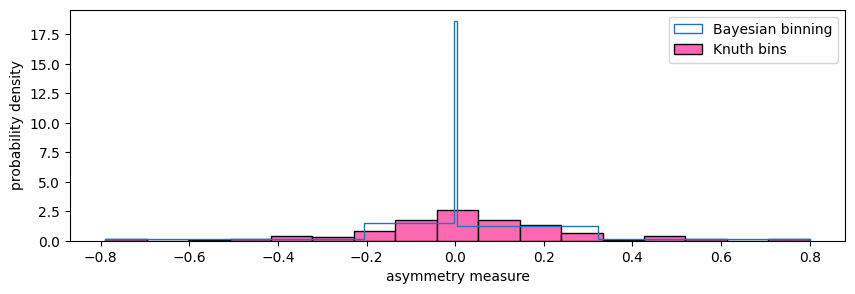

In [13]:
lcs = LC_Set(lc_array, block_min=2)  # single block flares do not resolve asymmetry
lcs.plot_asym()
plt.legend()
plt.ylabel("probability density")
plt.xlabel("asymmetry measure")
# for histogram binning see https://docs.astropy.org/en/stable/api/astropy.visualization.hist.html

# APPENDIX

### A1: Find significant fluctuations with respect to threshold
1. <code>flux_buffer</code><br>
Set every flux bin under threshold to threshold before initializing light curve object and then apply Bayesian blocks

2. <code>get_bblocks_above</code><br>
Create Bayesian blocks for light curve but set every block that is under threshold to threshold

-> detect significant variations wrt threshold = flares?

ATTENTION! This returns artificial flux values! Use cautiously if at all..

### A2: <code>astropy.stats.bayesian_blocks</code> returns edges
i.e. value in unit of time where changes are significant; first and last edge coincide with data bin, the rest is inbetween data bins (shown with red stripes)<br>
what we need for further processing is index of time array (shown with green stripes)

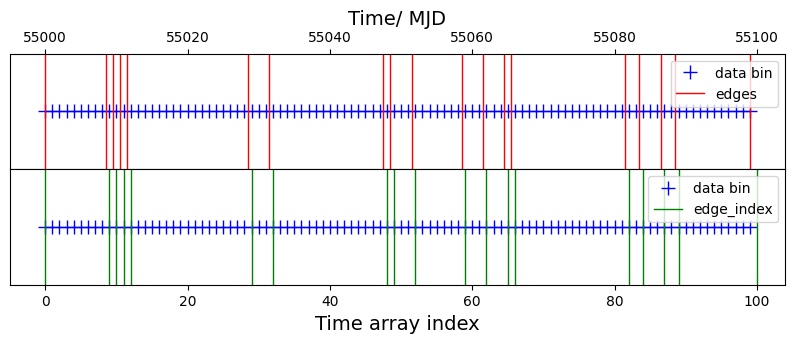

In [14]:
time, flux, flux_error = np.load("lightcurves/lc.npy")  # mock lc with gaussian flares
time += 55000  # e.g. MJD
fig = plt.figure(0, (10, 3))
time_one = np.ones(len(time))  # used for plotting
ax0 = fig.add_subplot(211)
plt.plot(
    time, time_one, linewidth=0, label="data bin", marker="+", c="blue", markersize=10
)
plt.axvline(edges[0], color="red", label="edges", linewidth=1)
for i in range(1, len(edges)):
    plt.axvline(edges[i], color="red", linewidth=1)
plt.xlabel("Time/ MJD", fontsize=14)
plt.yticks([])
ax0.xaxis.tick_top()
ax0.xaxis.set_label_position("top")
plt.legend()

ax1 = fig.add_subplot(212)
plt.plot(time_one, linewidth=0, label="data bin", marker="+", c="blue", markersize=10)
plt.axvline(edge_index[0], color="green", label="edge_index", linewidth=1)
for i in range(1, len(edge_index)):
    plt.axvline(edge_index[i], color="green", linewidth=1)
plt.xlabel("Time array index", fontsize=14)
plt.yticks([])
plt.legend()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0)